<a href="https://colab.research.google.com/github/Kavya-kakkar/Vibe-matcher/blob/main/Prototype_AI_Powered_Vibe_Matcher_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Librarires

In [8]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
import time
import timeit
import matplotlib.pyplot as plt
import seaborn as sns
from typing import List, Dict, Tuple
import warnings
warnings.filterwarnings('ignore')

print("Vibe Matcher System")
print("=" * 60)

Vibe Matcher System


Embeddings System

In [9]:
class AdvancedEmbeddingGenerator:
    """Advanced embedding generator with semantic understanding - No API needed"""

    def __init__(self):
        self.vibe_dimensions = {
            'boho': ['flowy', 'earthy', 'festival', 'bohemian', 'hippie', 'natural', 'organic', 'free', 'spirited', 'artistic'],
            'urban': ['urban', 'city', 'chic', 'modern', 'sleek', 'sophisticated', 'professional', 'contemporary', 'metropolitan', 'polished'],
            'cozy': ['cozy', 'warm', 'comfort', 'soft', 'relaxed', 'comfortable', 'snug', 'warmth', 'softness', 'comforting'],
            'energetic': ['energetic', 'active', 'vibrant', 'dynamic', 'bright', 'lively', 'movement', 'athletic', 'sporty', 'powerful'],
            'minimalist': ['minimalist', 'simple', 'clean', 'minimal', 'essential', 'basic', 'streamlined', 'understated', 'refined', 'pure'],
            'vintage': ['vintage', 'retro', 'classic', 'nostalgic', 'antique', 'old-school', 'timeless', 'heritage', 'retro', 'classic'],
            'glamorous': ['glamorous', 'elegant', 'luxurious', 'fancy', 'sophisticated', 'glam', 'couture', 'dramatic', 'opulent', 'luxury'],
            'streetwear': ['streetwear', 'street', 'edgy', 'urban', 'casual', 'cool', 'trendy', 'hip-hop', 'sneakers', 'urban']
        }


        self.style_indicators = {
            'formal': ['formal', 'elegant', 'sophisticated', 'tailored', 'structured'],
            'casual': ['casual', 'comfortable', 'relaxed', 'everyday', 'easy'],
            'party': ['party', 'celebration', 'festive', 'sparkly', 'glitter'],
            'professional': ['professional', 'office', 'work', 'business', 'corporate'],
            'athletic': ['athletic', 'sport', 'active', 'workout', 'performance']
        }

        self.vectorizer = TfidfVectorizer(max_features=100, stop_words='english')
        self.fitted = False

    def fit_vectorizer(self, descriptions: List[str]):
        """Fit the vectorizer on product descriptions"""
        self.vectorizer.fit(descriptions)
        self.fitted = True

    def text_to_embedding(self, text: str) -> np.array:
        """Convert text to semantic embedding using advanced analysis"""
        text_lower = text.lower()


        vibe_scores = np.zeros(len(self.vibe_dimensions))
        vibes = list(self.vibe_dimensions.keys())

        for i, vibe in enumerate(vibes):
            keywords = self.vibe_dimensions[vibe]

            matches = 0
            total_weight = 0

            for keyword in keywords:
                weight = 2 if f' {keyword} ' in f' {text_lower} ' else 1
                if keyword in text_lower:
                    matches += weight
                total_weight += weight

            vibe_scores[i] = matches / total_weight if total_weight > 0 else 0


        style_scores = np.zeros(len(self.style_indicators))
        styles = list(self.style_indicators.keys())

        for i, style in enumerate(styles):
            keywords = self.style_indicators[style]
            matches = sum(1 for keyword in keywords if keyword in text_lower)
            style_scores[i] = matches / len(keywords)


        text_features = [
            len(text_lower) / 200,
            text_lower.count('!') / 3,
            sum(text_lower.count(color) for color in ['black', 'white', 'red', 'blue', 'green', 'pink', 'yellow']) / 5,
            sum(1 for word in ['soft', 'comfort', 'easy', 'relax', 'cozy'] if word in text_lower) / 3,
            sum(1 for word in ['sharp', 'structured', 'tailored', 'formal', 'elegant'] if word in text_lower) / 3,
            sum(1 for word in ['bright', 'vibrant', 'colorful', 'bold', 'dynamic'] if word in text_lower) / 3,
            sum(1 for word in ['light', 'airy', 'breathable', 'summer'] if word in text_lower) / 3,
            sum(1 for word in ['warm', 'insulated', 'winter', 'thermal'] if word in text_lower) / 3
        ]


        if self.fitted:
            try:
                tfidf_features = self.vectorizer.transform([text_lower]).toarray()[0]
            except:
                tfidf_features = np.zeros(100)
        else:
            tfidf_features = np.zeros(100)


        combined_embedding = np.concatenate([
            vibe_scores,
            style_scores,
            text_features,
            tfidf_features[:79]
        ])


        if len(combined_embedding) > 100:
            combined_embedding = combined_embedding[:100]
        elif len(combined_embedding) < 100:
            combined_embedding = np.pad(combined_embedding, (0, 100 - len(combined_embedding)))


        np.random.seed(hash(text) % 10000)
        random_noise = np.random.normal(0, 0.01, len(combined_embedding))
        final_embedding = combined_embedding + random_noise

        return final_embedding


embedder = AdvancedEmbeddingGenerator()
print("✅ Advanced embedding generator initialized!")

✅ Advanced embedding generator initialized!


DATA PREPARATION

In [10]:
def create_fashion_dataset():
    """Create mock fashion product dataset with descriptions and vibe tags"""

    fashion_data = [
        {
            "name": "Boho Festival Dress",
            "desc": "Flowy maxi dress with earthy tones, floral patterns, and lightweight fabric perfect for music festivals and summer gatherings. Free-spirited bohemian style with natural organic materials.",
            "vibes": ["boho", "festival", "earthy", "free-spirited"]
        },
        {
            "name": "Urban Chic Blazer",
            "desc": "Structured black blazer with sharp tailoring, perfect for city nights and professional settings with an edge. Modern sophisticated urban wear for metropolitan lifestyle.",
            "vibes": ["urban", "chic", "sophisticated", "modern"]
        },
        {
            "name": "Cozy Knit Sweater",
            "desc": "Oversized cable-knit sweater in warm cream color, made from soft merino wool for comfortable lounging. Ultimate cozy comfort with soft relaxed fit for winter warmth.",
            "vibes": ["cozy", "comfort", "warm", "relaxed"]
        },
        {
            "name": "Energetic Running Set",
            "desc": "Bright colored athletic set with moisture-wicking fabric and dynamic patterns for high-energy workouts. Vibrant energetic sportswear for active lifestyle and movement.",
            "vibes": ["energetic", "athletic", "vibrant", "active"]
        },
        {
            "name": "Minimalist Linen Shirt",
            "desc": "Clean-cut linen shirt in neutral tones with minimalist design and sustainable materials. Simple essential basic with clean understated elegance.",
            "vibes": ["minimalist", "sustainable", "clean", "effortless"]
        },
        {
            "name": "Vintage Denim Jacket",
            "desc": "Distressed denim jacket with vintage wash and custom embroidery for retro-inspired looks. Classic timeless heritage style with nostalgic old-school vibes.",
            "vibes": ["vintage", "retro", "rebellious", "nostalgic"]
        },
        {
            "name": "Glam Evening Gown",
            "desc": "Sequined floor-length gown with dramatic silhouette and luxurious silk fabric for formal events. Elegant glamorous couture for sophisticated fancy occasions.",
            "vibes": ["glamorous", "elegant", "luxurious", "dramatic"]
        },
        {
            "name": "Street Style Hoodie",
            "desc": "Oversized graphic hoodie with bold prints and comfortable fit for urban street fashion. Edgy cool streetwear with trendy urban casual vibes.",
            "vibes": ["streetwear", "urban", "edgy", "comfortable"]
        },
        {
            "name": "Professional Work Dress",
            "desc": "Tailored fit dress with structured silhouette for professional office settings. Modern chic sophisticated urban workwear.",
            "vibes": ["urban", "sophisticated", "professional", "modern"]
        },
        {
            "name": "Beach Cover Up",
            "desc": "Lightweight flowy cover up with tropical patterns and easy breezy fit. Bohemian free-spirited natural beach vibes.",
            "vibes": ["boho", "beachy", "flowy", "natural"]
        }
    ]

    return pd.DataFrame(fashion_data)


df_products = create_fashion_dataset()
print("Fashion Dataset Created:")
print(f"Number of products: {len(df_products)}")
print("\nSample products:")
for i, row in df_products.head(3).iterrows():
    print(f"  {row['name']}: {row['vibes']}")
print("=" * 60)

Fashion Dataset Created:
Number of products: 10

Sample products:
  Boho Festival Dress: ['boho', 'festival', 'earthy', 'free-spirited']
  Urban Chic Blazer: ['urban', 'chic', 'sophisticated', 'modern']
  Cozy Knit Sweater: ['cozy', 'comfort', 'warm', 'relaxed']


EMBEDDING GENERATION

In [11]:
def generate_all_embeddings(df: pd.DataFrame) -> pd.DataFrame:
    """Generate embeddings for all product descriptions"""
    print("🔄 Generating advanced embeddings for products...")


    descriptions = df['desc'].tolist()
    embedder.fit_vectorizer(descriptions)

    embeddings = []
    for i, row in df.iterrows():
        print(f"  Embedding {i+1}/{len(df)}: {row['name']}")
        embedding = embedder.text_to_embedding(row['desc'])
        embeddings.append(embedding)

    df['embedding'] = embeddings
    df['embedding_array'] = [np.array(emb) for emb in embeddings]

    print("All embeddings generated successfully!")
    print(f"Embedding dimension: {len(embeddings[0])}")
    return df


df_products = generate_all_embeddings(df_products)
print("=" * 60)

🔄 Generating advanced embeddings for products...
  Embedding 1/10: Boho Festival Dress
  Embedding 2/10: Urban Chic Blazer
  Embedding 3/10: Cozy Knit Sweater
  Embedding 4/10: Energetic Running Set
  Embedding 5/10: Minimalist Linen Shirt
  Embedding 6/10: Vintage Denim Jacket
  Embedding 7/10: Glam Evening Gown
  Embedding 8/10: Street Style Hoodie
  Embedding 9/10: Professional Work Dress
  Embedding 10/10: Beach Cover Up
All embeddings generated successfully!
Embedding dimension: 100


VECTOR SEARCH & SIMILARITY

In [13]:
class VibeMatcher:


    def __init__(self, products_df: pd.DataFrame):
        self.df = products_df
        self.embeddings = np.array([emb for emb in products_df['embedding_array']])
        self.embedder = embedder

    def get_query_embedding(self, query: str) -> np.array:

        return self.embedder.text_to_embedding(query)

    def find_similar_products(self, query: str, top_k: int = 3, similarity_threshold: float = 0.5) -> Tuple[pd.DataFrame, float]:

        start_time = time.time()


        query_embedding = self.get_query_embedding(query)
        query_embedding = query_embedding.reshape(1, -1)


        similarities = cosine_similarity(query_embedding, self.embeddings)[0]


        top_indices = np.argsort(similarities)[::-1]
        top_indices = [idx for idx in top_indices if similarities[idx] >= similarity_threshold][:top_k]


        if len(top_indices) == 0:
            print("⚠️  No strong matches found. Showing best available matches...")
            top_indices = np.argsort(similarities)[::-1][:top_k]


        results = []
        for idx in top_indices:
            match_quality = 'good' if similarities[idx] > 0.6 else 'fair'
            results.append({
                'rank': len(results) + 1,
                'name': self.df.iloc[idx]['name'],
                'description': self.df.iloc[idx]['desc'],
                'vibes': self.df.iloc[idx]['vibes'],
                'similarity_score': round(similarities[idx], 4),
                'match_quality': match_quality
            })

        latency = time.time() - start_time

        return pd.DataFrame(results), latency


vibe_matcher = VibeMatcher(df_products)
print(" Vibe Matcher initialized successfully!")
print("=" * 60)

 Vibe Matcher initialized successfully!


TESTING & EVALUATION

Starting evaluation with 3 test queries...
🧪 RUNNING COMPREHENSIVE EVALUATION

Query 1: 'energetic urban chic'
----------------------------------------
⚠️  No strong matches found. Showing best available matches...
✅ #1 Professional Work Dress
   Score: 0.3839 (fair)
   Vibes: ['urban', 'sophisticated', 'professional', 'modern']
✅ #2 Street Style Hoodie
   Score: 0.2752 (fair)
   Vibes: ['streetwear', 'urban', 'edgy', 'comfortable']
✅ #3 Urban Chic Blazer
   Score: 0.2561 (fair)
   Vibes: ['urban', 'chic', 'sophisticated', 'modern']
⏱️  Latency: 0.0044s

Query 2: 'cozy comfortable warm'
----------------------------------------
🎯 #1 Cozy Knit Sweater
   Score: 0.705 (good)
   Vibes: ['cozy', 'comfort', 'warm', 'relaxed']
⏱️  Latency: 0.0019s

Query 3: 'boho festival earthy'
----------------------------------------
⚠️  No strong matches found. Showing best available matches...
✅ #1 Boho Festival Dress
   Score: 0.3672 (fair)
   Vibes: ['boho', 'festival', 'earthy', 'free-spirited']
✅ #2 

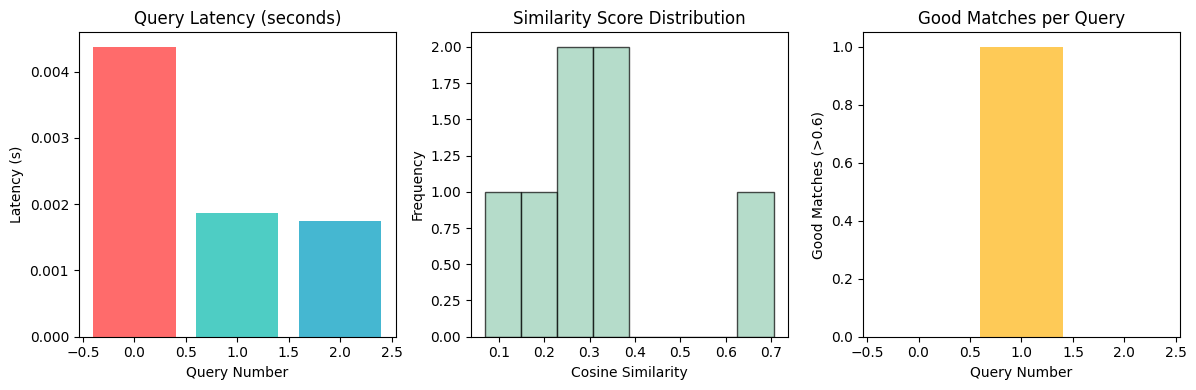


 PERFORMANCE BENCHMARKING
⚠️  No strong matches found. Showing best available matches...
⚠️  No strong matches found. Showing best available matches...
⚠️  No strong matches found. Showing best available matches...
⚠️  No strong matches found. Showing best available matches...
⚠️  No strong matches found. Showing best available matches...
⚠️  No strong matches found. Showing best available matches...
⚠️  No strong matches found. Showing best available matches...
⚠️  No strong matches found. Showing best available matches...
⚠️  No strong matches found. Showing best available matches...
⚠️  No strong matches found. Showing best available matches...
Average operation time: 0.0030s


In [14]:
def run_comprehensive_evaluation():

    test_queries = [
        "energetic urban chic",
        "cozy comfortable warm",
        "boho festival earthy"
    ]

    print("🧪 RUNNING COMPREHENSIVE EVALUATION")
    print("=" * 50)

    all_results = []
    latencies = []

    for i, query in enumerate(test_queries, 1):
        print(f"\nQuery {i}: '{query}'")
        print("-" * 40)

        # Get matches
        matches, latency = vibe_matcher.find_similar_products(query)
        latencies.append(latency)


        for _, match in matches.iterrows():
            quality_icon = "🎯" if match['match_quality'] == 'good' else "✅"
            print(f"{quality_icon} #{match['rank']} {match['name']}")
            print(f"   Score: {match['similarity_score']} ({match['match_quality']})")
            print(f"   Vibes: {match['vibes']}")


        all_results.append({
            'query': query,
            'matches': matches,
            'avg_similarity': matches['similarity_score'].mean(),
            'good_matches': len(matches[matches['similarity_score'] > 0.6]),
            'latency': latency
        })

        print(f"⏱️  Latency: {latency:.4f}s")

    return all_results, latencies


print("Starting evaluation with 3 test queries...")
test_results, test_latencies = run_comprehensive_evaluation()


print("\n PERFORMANCE METRICS")
print("=" * 50)

avg_similarity = np.mean([r['avg_similarity'] for r in test_results])
good_match_rate = np.mean([r['good_matches'] / 3 for r in test_results])
avg_latency = np.mean(test_latencies)

print(f"Average Similarity Score: {avg_similarity:.3f}")
print(f"Good Match Rate (>0.6): {good_match_rate:.2%}")
print(f" Average Latency: {avg_latency:.4f}s")
print(f"Embedding Mode: Advanced Local Embeddings")

# Visualization
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.bar(range(len(test_latencies)), test_latencies, color=['#FF6B6B', '#4ECDC4', '#45B7D1'])
plt.title('Query Latency (seconds)')
plt.xlabel('Query Number')
plt.ylabel('Latency (s)')

plt.subplot(1, 3, 2)
similarity_scores = []
for result in test_results:
    similarity_scores.extend(result['matches']['similarity_score'])

plt.hist(similarity_scores, bins=8, alpha=0.7, color='#96CEB4', edgecolor='black')
plt.title('Similarity Score Distribution')
plt.xlabel('Cosine Similarity')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
match_qualities = [result['good_matches'] for result in test_results]
plt.bar(range(len(match_qualities)), match_qualities, color='#FECA57')
plt.title('Good Matches per Query')
plt.xlabel('Query Number')
plt.ylabel('Good Matches (>0.6)')

plt.tight_layout()
plt.show()


print("\n PERFORMANCE BENCHMARKING")
print("=" * 50)

benchmark_time = timeit.timeit(
    lambda: vibe_matcher.find_similar_products("test query"),
    number=10
) / 10

print(f"Average operation time: {benchmark_time:.4f}s")


Demo

In [ ]:
def interactive_demo():
    """Interactive demo for the Vibe Matcher"""
    print("\n INTERACTIVE VIBE MATCHER DEMO")
    print("=" * 50)
    print("Describe your fashion vibe and get recommendations!")
    print("Examples: 'cozy winter vibes', 'elegant evening wear', 'street style urban'")
    print("Type 'quit' to exit.\n")

    while True:
        user_query = input(" What's your fashion vibe? ").strip()

        if user_query.lower() in ['quit', 'exit', 'q']:
            break

        if not user_query:
            print("Please enter a vibe description!")
            continue

        print(f"\n Searching for: '{user_query}'")
        matches, latency = vibe_matcher.find_similar_products(user_query)

        if len(matches) > 0:
            print(f"✨ Top {len(matches)} Recommendations:")
            for _, match in matches.iterrows():
                stars = "⭐" * int(match['similarity_score'] * 5) + "☆" * (5 - int(match['similarity_score'] * 5))
                print(f"\n{match['rank']}. {match['name']} {stars}")
                print(f"   Score: {match['similarity_score']} ({match['match_quality']} match)")
                print(f"   Vibes: {', '.join(match['vibes'])}")
                print(f"   Description: {match['description']}")
        else:
            print(" No matches found. Try a different vibe description!")

        print(f"\n  Found in {latency:.4f}s")
        print("-" * 60)


interactive_demo()


 INTERACTIVE VIBE MATCHER DEMO
Describe your fashion vibe and get recommendations!
Examples: 'cozy winter vibes', 'elegant evening wear', 'street style urban'
Type 'quit' to exit.

 What's your fashion vibe? urban 

 Searching for: 'urban'
✨ Top 1 Recommendations:

1. Street Style Hoodie ⭐⭐☆☆☆
   Score: 0.5343 (fair match)
   Vibes: streetwear, urban, edgy, comfortable
   Description: Oversized graphic hoodie with bold prints and comfortable fit for urban street fashion. Edgy cool streetwear with trendy urban casual vibes.

  Found in 0.0073s
------------------------------------------------------------
